<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/ann_classify_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

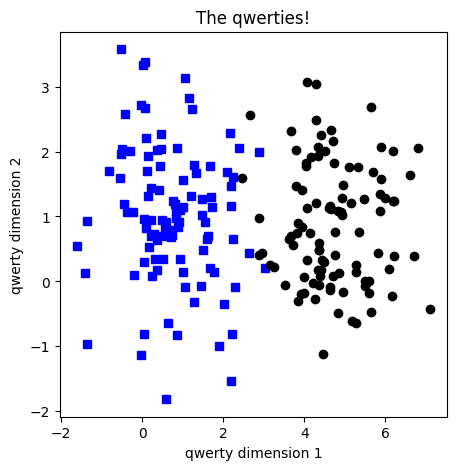

In [80]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [81]:
ann_classify=nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

lr=0.05
loss_fun=nn.BCELoss()
optimizer=torch.optim.SGD(ann_classify.parameters(),lr)

In [82]:
num_epochs=1000
losses=torch.zeros(num_epochs)

for epochi in range(num_epochs):
  yhat=ann_classify(data)

  loss=loss_fun(yhat,labels)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

predictions=ann_classify(data)

In [83]:
pred_labels=predictions>0.5
torch.mean((pred_labels==labels).float())

tensor(0.9850)

In [84]:
losses[-1]

tensor(0.1393, grad_fn=<SelectBackward0>)

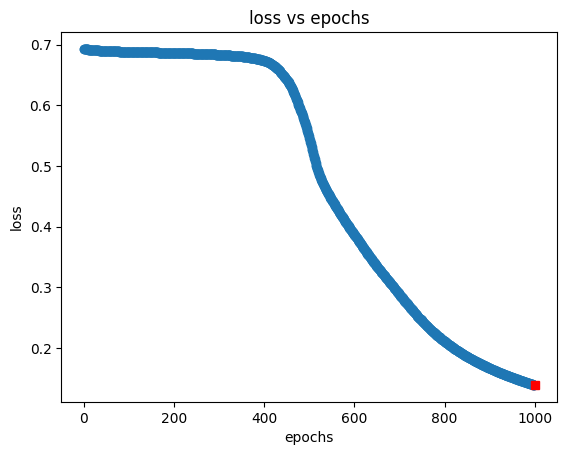

In [85]:
plt.plot(losses.detach(),'o')
plt.plot(num_epochs,losses[-1].detach(),'rs')
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()